<a href="https://colab.research.google.com/github/alokbhoi447/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>



*   **id ->** reference number of the rental property/apartment assigned by Airbnb
*  **name ->** name of apartment or house 
*  **host id ->** reference number of the host or the ownwer of the property
*   **host name ->** Name of the host or owner of the apartment
*  **neighbourhood group ->** Name of the group of neighbourhoods
* **neighbourhood ->** Name of the neighbourhod
* **latitude ->** latitude of the location of the apartment
* **longitude ->** longitude of the location of the apartment
* **room type ->** type of room that the apartment provides to rent
* **price ->** price of the room/apartment 
* **minimum nights ->** number of minimum nights a customer has to book to rent the room/apartment
* **number of reviews ->** number of total reviews the apartment/property has received
* **last reveiw ->** the last date in which the apartment received a review
* **reveiws per month ->** Average how many reviews the apartment gets
* **calculated host listing ->** 
* **avalilability_365 ->**







In [146]:
import pandas as pd
import numpy as np

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
path = '/content/drive/MyDrive/ALMABETTER/MODULE 2/EDA/Copy of Airbnb NYC 2019.csv'

In [149]:
df = pd.read_csv(path)

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [152]:
df[df['minimum_nights']=='NaN']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


# **Number of Hotels in each neighbourhood group**

In [153]:
hotels_neighbourhood_group= df.groupby(['neighbourhood_group'])['neighbourhood'].count()

In [154]:
hotels_neighbourhood_group

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

Text(0.5, 0, 'Neighbourhood group')

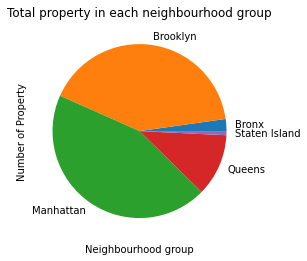

In [155]:
hotels_neighbourhood_group.plot(kind='pie')
plt.title('Total property in each neighbourhood group')
plt.ylabel('Number of Property')
plt.xlabel('Neighbourhood group')


# **Top 5 host**

In [189]:
top_10_host = df.groupby(['host_id','host_name'])['host_name'].count().sort_values(ascending=False).head(5)
top_10_host

host_id    host_name   
219517861  Sonder (NYC)    327
107434423  Blueground      232
30283594   Kara            121
137358866  Kazuya          103
12243051   Sonder           96
Name: host_name, dtype: int64

Text(0.5, 0, 'Number of property')

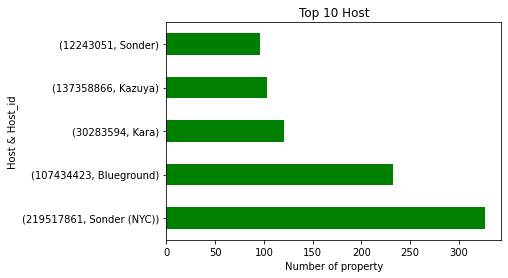

In [190]:
top_10_host.plot(kind = 'barh', color='green')

plt.title('Top 10 Host')
plt.ylabel('Host & Host_id')
plt.xlabel('Number of property')

# **Number of neighbourhoods in each neighborhood group**

In [158]:
number_of_neighbourhood = df.groupby('neighbourhood_group')['neighbourhood'].count()
number_of_neighbourhood

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

NameError: ignored

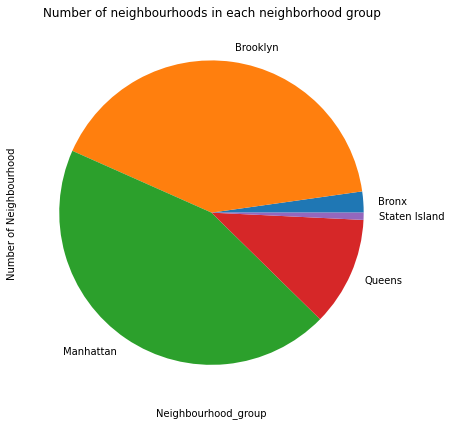

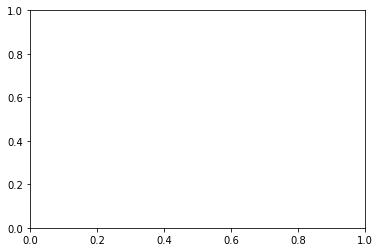

In [194]:
number_of_neighbourhood.plot(kind='pie',figsize=(7,7))

plt.title('Number of neighbourhoods in each neighborhood group')
plt.ylabel('Number of Neighbourhood')
plt.xlabel('Neighbourhood_group')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()
explode = (0, 0.1, 0, 0)



# **Number of rooms by different room types in each neighbourhood group**

In [160]:
room_type = df.groupby(['neighbourhood_group','room_type'])['neighbourhood_group'].count().unstack('room_type')
room_type

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


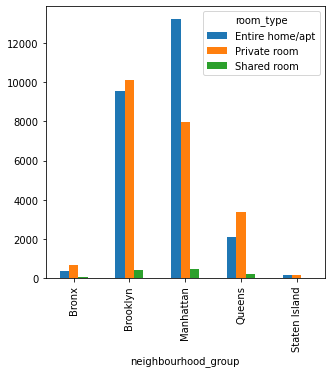

In [161]:
room_type.plot(kind='bar',figsize=(5,5))

# **Number of reviews with respect to different room types**

In [162]:
number_of_reviews = df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().unstack()
number_of_reviews

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,11627,16312,432
Brooklyn,267128,213653,5793
Manhattan,235147,209150,10272
Queens,60644,93561,2745
Staten Island,5857,5670,14


Text(0.5, 0, 'neighbourhood_group')

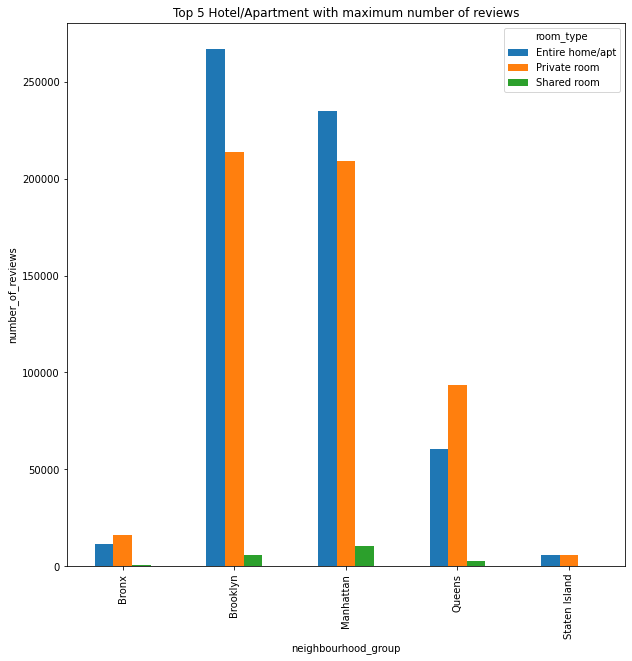

In [163]:
number_of_reviews.plot(kind = 'bar',figsize=(10,10))

plt.title('Top 5 Hotel/Apartment with maximum number of reviews')
plt.ylabel('number_of_reviews')
plt.xlabel('neighbourhood_group')

# **Average price for different room types**

In [164]:
room_type_price = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
room_type_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


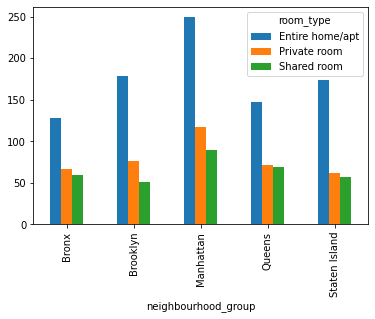

In [182]:
room_type_price.plot(kind='bar')

In [166]:
# df['Month']= df['last_review'][:7]
# df['Month'].value_counts()

In [167]:
#df.groupby(['neighbourhood_group','room_type'])['price'].describe()

# **Top 5 Hotel/Apartment with maximum number of reviews**

In [191]:
maximum_reviews = df.groupby(['id','name','room_type'])['number_of_reviews'].sum().sort_values(ascending=False).head(5)
maximum_reviews

id        name                            room_type   
9145202   Room near JFK Queen Bed         Private room    629
903972    Great Bedroom in Manhattan      Private room    607
903947    Beautiful Bedroom in Manhattan  Private room    597
891117    Private Bedroom in Manhattan    Private room    594
10101135  Room Near JFK Twin Beds         Private room    576
Name: number_of_reviews, dtype: int64

Text(0.5, 0, 'Name of Hotel/Apartment')

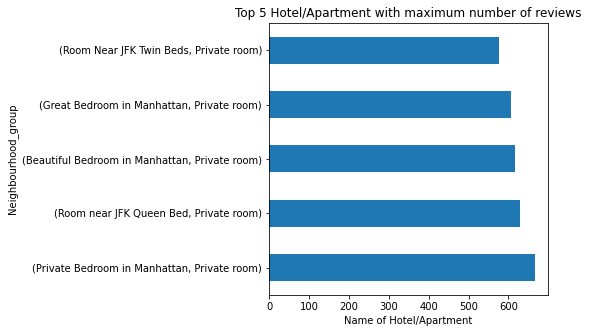

In [169]:
maximum_reviews.plot(kind = 'barh',figsize=(5,5))

plt.title('Top 5 Hotel/Apartment with maximum number of reviews')
plt.ylabel('Neighbourhood_group')
plt.xlabel('Name of Hotel/Apartment')


In [177]:
df.groupby(['host_id','host_name'])['calculated_host_listings_count'].first().sort_values(ascending=False)

host_id    host_name   
219517861  Sonder (NYC)    327
107434423  Blueground      232
30283594   Kara            121
137358866  Kazuya          103
12243051   Sonder           96
                          ... 
48818023   Sarah             1
48819868   Nick              1
48823036   Fred              1
48823279   Chris             1
2438       Tasos             1
Name: calculated_host_listings_count, Length: 37439, dtype: int64

In [ ]:
df5 = df[df['name']=='Beautiful Bedroom in Manhattan']
df5